In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from src.eit.lib.lib import Import_data
from sklearn.metrics import silhouette_score
path = Import_data()
# get all files in the directory
files = os.listdir(path)
print(files)

Path to dataset files: /Users/daniel/.cache/kagglehub/datasets/arashnic/earthquake-magnitude-damage-and-impact/versions/6
['csv_household_resources.csv', 'csv_building_structure.csv', 'ward_vdcmun_district_name_mapping.csv', 'mapping.csv', 'csv_building_ownership_and_use.csv', 'csv_building_damage_assessment.csv', 'csv_household_demographics.csv', 'csv_individual_demographics.csv', 'csv_household_earthquake_impact.csv']


In [201]:
# print the first 5 rows of the data for each file
for file in files:
    #display the filename as a header fotmatted in bold
    print("\033[1m" + file + "\033[0m")
    data = pd.read_csv(path + "/" + file)
    display(data.head())

csv_household_resources.csv


,household_id,district_id,vdcmun_id,ward_id,source_water_pre_eq,source_water_post_eq,source_cooking_fuel_pre_eq,source_cooking_fuel_post_eq,source_light_pre_eq,source_light_post_eq,...,has_asset_cable_post_eq,has_asset_computer_post_eq,has_asset_internet_post_eq,has_asset_telephone_post_eq,has_asset_mobile_phone_post_eq,has_asset_fridge_post_eq,has_asset_motorcycle_post_eq,has_asset_four_wheeler_family_use_post_eq,has_asset_four_wheeler_commercial_post_eq,has_asset_none_post_eq
0,12010100001101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,...,0,0,0,0,1,0,0,0,0,0
1,12010100002101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,...,0,0,0,0,1,0,0,0,0,0
2,12010100003101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,...,0,0,0,0,1,0,0,0,0,0
3,12010100004101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,...,0,0,0,0,1,0,0,0,0,0
4,12010100005101,12,1207,120703,Pipeline,Pipeline,Wood,Wood,Electricity,Electricity,...,0,0,0,0,1,0,0,0,0,0


csv_building_structure.csv


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


ward_vdcmun_district_name_mapping.csv


,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


mapping.csv


,individual_id,household_id,building_id
0,12010200004101001,12010200004101,120102000041
1,12010200004101002,12010200004101,120102000041
2,12010200004101003,12010200004101,120102000041
3,12010200004101004,12010200004101,120102000041
4,12010200004101005,12010200004101,120102000041


csv_building_ownership_and_use.csv


,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


csv_building_damage_assessment.csv


/var/folders/r8/h1my0vhj4fg52gzkcmy0x_0c0000gn/T/ipykernel_17641/1906744959.py:5: DtypeWarning: Columns (5,17,29,34,35,36,37,38,39,40,41,42,43,47,50) have mixed types. Specify dtype option on import or set low_memory=False.


,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,...,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,NaN,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Insignificant/light,NaN,NaN,NaN,NaN,Insignificant/light-(<1/3),...,0.0,0.0,0.0,0,0,0,0,0,0,0


csv_household_demographics.csv


,household_id,district_id,vdcmun_id,ward_id,gender_household_head,age_household_head,caste_household,education_level_household_head,income_level_household,size_household,is_bank_account_present_in_household
0,12010100001101,12,1207,120703,Male,31.0,Rai,Illiterate,Rs. 10 thousand,3.0,0.0
1,12010100002101,12,1207,120703,Female,62.0,Rai,Illiterate,Rs. 10 thousand,6.0,0.0
2,12010100003101,12,1207,120703,Male,51.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,13.0,0.0
3,12010100004101,12,1207,120703,Male,48.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,5.0,0.0
4,12010100005101,12,1207,120703,Male,70.0,Gharti/Bhujel,Illiterate,Rs. 10 thousand,8.0,0.0


csv_individual_demographics.csv


,individual_id,district_id,vdcmun_id,ward_id,gender_individual,age_individual,presence_in_household,disability_individual,has_registered_birth,education_level_individual,marital_status_individual
0,12010100001101001,12,1207,120703,Male,31,Mostly Present,No,NaN,Illiterate,Married
1,12010100001101002,12,1207,120703,Female,58,Mostly Present,No,NaN,Illiterate,Married
2,12010100001101003,12,1207,120703,Male,15,Mostly Present,No,NaN,Class 7,Not Married
3,12010100002101001,12,1207,120703,Female,62,Mostly Present,No,NaN,Illiterate,Widow/Widower
4,12010100002101002,12,1207,120703,Male,23,Not present-Abroad,No,NaN,Class 6,Married


csv_household_earthquake_impact.csv


,household_id,district_id,vdcmun_id,ward_id,shelter_condition_household_post_eq,residence_household_pre_eq,residence_household_post_eq,household_eq_id_type,has_death_occurred_last_12_months,count_death_last_12_months,...,has_occupation_change_occurred_last_12_months,count_occupation_change_last_12_months,residence_district_household_head_pre_eq,residence_district_household_head_post_eq,is_recipient_rahat_15k,is_recipient_rahat_10k,is_recipient_rahat_200k,is_recipient_rahat_social_security_3k,is_recipient_rahat_none,is_ineligible_rahat
0,12010100001101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,ID Card for Total Destruction,0.0,NaN,...,0.0,NaN,NaN,NaN,1,1,0,0,0,0
1,12010100002101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,1,0
2,12010100003101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,1,0
3,12010100004101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,1,0
4,12010100005101,12,1207,120703,Staying in their own house,This VDC/Municipality,This VDC/Municipality,Have not received ID Card,0.0,NaN,...,0.0,NaN,NaN,NaN,0,0,0,0,1,0


In [202]:
demographics = pd.read_csv(os.path.join(path, "csv_household_demographics.csv"))


In [203]:
demographics["income_level_household"].value_counts()

income_level_household
Rs. 10 thousand            409102
Rs. 10-20 thousand         231688
Rs. 20-30 thousand          76124
Rs. 30-50 thousand          21943
Rs. 50 thousand or more      8280
Name: count, dtype: int64

In [204]:
def convert_income(income):
    mapping = {
        "Rs. 10 thousand": 10000,
        "Rs. 10-20 thousand": 15000,
        "Rs. 20-30 thousand": 25000,
        "Rs. 30-50 thousand": 40000,
        "Rs. 50 thousand or more": 50000
    }
    return mapping.get(income, None)  # Convert or return None if not found


In [205]:
demographics.columns


Index(['household_id', 'district_id', 'vdcmun_id', 'ward_id',
       'gender_household_head', 'age_household_head', 'caste_household',
       'education_level_household_head', 'income_level_household',
       'size_household', 'is_bank_account_present_in_household'],
      dtype='object')

In [206]:
demographics["income_level_household"] = demographics["income_level_household"].apply(convert_income)

In [207]:
demographics["income_level_household"].value_counts()
demographics = demographics.drop(columns=["household_id", "district_id", "vdcmun_id", "ward_id"])

In [208]:
demographics.info()
demographics = demographics.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747365 entries, 0 to 747364
Data columns (total 7 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   gender_household_head                 747363 non-null  object 
 1   age_household_head                    747363 non-null  float64
 2   caste_household                       747137 non-null  object 
 3   education_level_household_head        747137 non-null  object 
 4   income_level_household                747137 non-null  float64
 5   size_household                        747363 non-null  float64
 6   is_bank_account_present_in_household  747137 non-null  float64
dtypes: float64(4), object(3)
memory usage: 39.9+ MB


In [209]:
categorical_columns = ["gender_household_head", "caste_household", "education_level_household_head"]
encoder = OneHotEncoder(drop="first", sparse_output=False)  # drop="first" avoids dummy variable trap
encoded_array = encoder.fit_transform(demographics[categorical_columns])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

# Merge with original DataFrame (excluding original categorical columns)
demographics = demographics.drop(columns=categorical_columns).reset_index(drop=True)
demographics = pd.concat([demographics, encoded_df], axis=1)

# Check the result
print(demographics.head())

   age_household_head  income_level_household  size_household  \
0                31.0                 10000.0             3.0   
1                62.0                 10000.0             6.0   
2                51.0                 10000.0            13.0   
3                48.0                 10000.0             5.0   
4                70.0                 10000.0             8.0   

   is_bank_account_present_in_household  gender_household_head_Male  \
0                                   0.0                         1.0   
1                                   0.0                         0.0   
2                                   0.0                         1.0   
3                                   0.0                         1.0   
4                                   0.0                         1.0   

   caste_household_Amat  caste_household_Badhaee  caste_household_Badi  \
0                   0.0                      0.0                   0.0   
1                   0.0           

In [210]:
numeric_features = demographics.select_dtypes(include=[np.number])

In [211]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

k = 5  # Try different k values

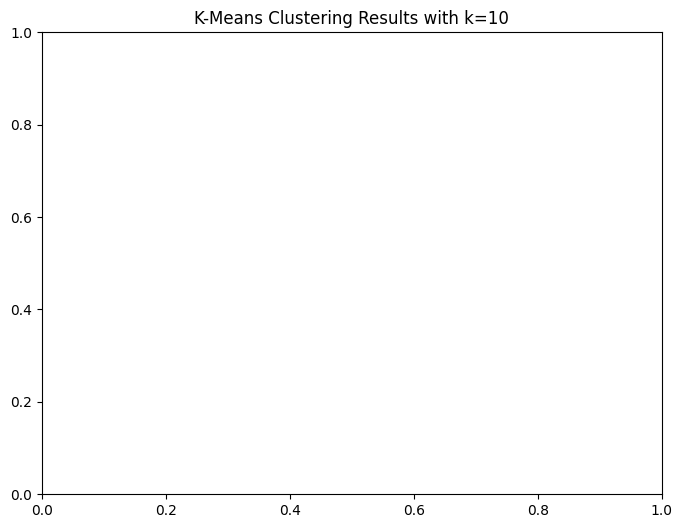

In [218]:

from joblib import Parallel, delayed


# Function to fit KMeans for a specific k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'scaled_features' is your preprocessed numerical data
k = 10  # Trying k from 2 to 10

#for k in K_range:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_features)


# 4️⃣ Visualizing the Clusters
plt.figure(figsize=(8, 6))
plt.title(f"K-Means Clustering Results with k={k}")
plt.show()

In [219]:
demographics["cluster"] = kmeans.labels_
demographics["cluster"].value_counts()

cluster
3    266156
6    263661
4    109104
2     28950
8     26949
1     26587
0     25505
7       188
5        36
9         1
Name: count, dtype: int64

In [229]:
cluster_summary = demographics.groupby("cluster").mean()

pd.set_option("display.max_columns", None)
cluster_summary[cluster_summary.index == 2]

,age_household_head,income_level_household,size_household,is_bank_account_present_in_household,gender_household_head_Male,caste_household_Amat,caste_household_Badhaee,caste_household_Badi,caste_household_Bahing,caste_household_Bangali,caste_household_Bantar/Sardar,caste_household_Baraee,caste_household_Bhote,caste_household_Bin,caste_household_Bote,caste_household_Brahman-Hill,caste_household_Brahman-Tarai,caste_household_Brahmu/Baramo,caste_household_Byasi/Sauka,caste_household_Chamar/Harijan/Ram,caste_household_Chamling,caste_household_Chepang/Praja,caste_household_Chhetree,caste_household_Damai/Dholi,caste_household_Danuwar,caste_household_Darai,caste_household_Dev,caste_household_Dhanuk,caste_household_Dhimal,caste_household_Dhobi,caste_household_Dom,caste_household_Dusadh/Pasawan/Pasi,caste_household_Gaderi/Bhedhar,caste_household_Gaine,caste_household_Ghale,caste_household_Gharti/Bhujel,caste_household_Gurung,caste_household_Hajam/Thakur,caste_household_Haluwai,caste_household_Hayu,caste_household_Hyolmo,caste_household_Jhangad/Dhagar,caste_household_Jirel,caste_household_Kahar,caste_household_Kalar,caste_household_Kalwar,caste_household_Kamar,caste_household_Kami,caste_household_Kanu,caste_household_Kathbaniyan,caste_household_Kayastha,caste_household_Kewat,caste_household_Khatwe,caste_household_Khawas,caste_household_Koche,caste_household_Koiri/Kushwaha,caste_household_Kori,caste_household_Kumal,caste_household_Kumhar,caste_household_Kurmi,caste_household_Kusunda,caste_household_Lepcha,caste_household_Lhopa,caste_household_Limbu,caste_household_Lohar,caste_household_Magar,caste_household_Majhi,caste_household_Mali,caste_household_Mallaha,caste_household_Marwadi,caste_household_Meche,caste_household_Mewahang Bala,caste_household_Musahar,caste_household_Musalman,caste_household_Natuwa,caste_household_Newar,caste_household_Nuniya,caste_household_Pahari,caste_household_Pattharkatta/Kushwadiya,caste_household_Rai,caste_household_Rajbansi,caste_household_Rajput,caste_household_Raute,caste_household_Samgpang,caste_household_Sanyasi/Dashnami,caste_household_Sarki,caste_household_Satar/Santhal,caste_household_Sherpa,caste_household_Sonar,caste_household_Sudhi,caste_household_Sunuwar,caste_household_Tamang,caste_household_Tatma/Tatwa,caste_household_Teli,caste_household_Thakali,caste_household_Thakuri,caste_household_Thami,caste_household_Tharu,caste_household_Yadav,caste_household_Yakkha,education_level_household_head_Class 1,education_level_household_head_Class 10,education_level_household_head_Class 2,education_level_household_head_Class 3,education_level_household_head_Class 4,education_level_household_head_Class 5,education_level_household_head_Class 6,education_level_household_head_Class 7,education_level_household_head_Class 8,education_level_household_head_Class 9,education_level_household_head_Illiterate,education_level_household_head_Intermediate or equivalent,education_level_household_head_Masters or equivalent,education_level_household_head_Non-formal education,education_level_household_head_Nursery/K.G./Kindergarten,education_level_household_head_Other,education_level_household_head_Ph.D. or equivalent,education_level_household_head_SLC or equivalent
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,34.663385,18423.143351,4.243005,0.573022,0.740829,0.0,0.000035,0.0,0.0,0.000069,0.0,0.0,0.000449,0.0,0.0,0.329914,0.002522,0.000311,0.0,0.000035,0.0,0.001658,0.240656,0.007634,0.004249,0.000069,0.0,0.000242,0.0,0.0,0.0,0.000035,0.000035,0.000069,0.0038,0.004974,0.019758,0.000242,0.000069,0.000276,0.000691,0.000138,0.004387,0.0,0.0,0.000656,0.000345,0.003938,0.000035,0.000069,0.000345,0.000035,0.0,0.000069,0.0,0.000415,0.0,0.002073,0.000035,0.000138,0.0,0.0,0.0,0.000173,0.000035,0.035268,0.004283,0.0,0.0,0.000415,0.0,0.0,0.000035,0.001244,0.0,0.125596,0.000069,0.00038,0.0,0.01057,0.000138,0.000207,0.000035,0.0,0.008566,0.008774,0.0,0.008463,0.00

In [231]:
cluster_summary = demographics.groupby("cluster").mean()
cluster_summary

,age_household_head,income_level_household,size_household,is_bank_account_present_in_household,gender_household_head_Male,caste_household_Amat,caste_household_Badhaee,caste_household_Badi,caste_household_Bahing,caste_household_Bangali,caste_household_Bantar/Sardar,caste_household_Baraee,caste_household_Bhote,caste_household_Bin,caste_household_Bote,caste_household_Brahman-Hill,caste_household_Brahman-Tarai,caste_household_Brahmu/Baramo,caste_household_Byasi/Sauka,caste_household_Chamar/Harijan/Ram,caste_household_Chamling,caste_household_Chepang/Praja,caste_household_Chhetree,caste_household_Damai/Dholi,caste_household_Danuwar,caste_household_Darai,caste_household_Dev,caste_household_Dhanuk,caste_household_Dhimal,caste_household_Dhobi,caste_household_Dom,caste_household_Dusadh/Pasawan/Pasi,caste_household_Gaderi/Bhedhar,caste_household_Gaine,caste_household_Ghale,caste_household_Gharti/Bhujel,caste_household_Gurung,caste_household_Hajam/Thakur,caste_household_Haluwai,caste_household_Hayu,caste_household_Hyolmo,caste_household_Jhangad/Dhagar,caste_household_Jirel,caste_household_Kahar,caste_household_Kalar,caste_household_Kalwar,caste_household_Kamar,caste_household_Kami,caste_household_Kanu,caste_household_Kathbaniyan,caste_household_Kayastha,caste_household_Kewat,caste_household_Khatwe,caste_household_Khawas,caste_household_Koche,caste_household_Koiri/Kushwaha,caste_household_Kori,caste_household_Kumal,caste_household_Kumhar,caste_household_Kurmi,caste_household_Kusunda,caste_household_Lepcha,caste_household_Lhopa,caste_household_Limbu,caste_household_Lohar,caste_household_Magar,caste_household_Majhi,caste_household_Mali,caste_household_Mallaha,caste_household_Marwadi,caste_household_Meche,caste_household_Mewahang Bala,caste_household_Musahar,caste_household_Musalman,caste_household_Natuwa,caste_household_Newar,caste_household_Nuniya,caste_household_Pahari,caste_household_Pattharkatta/Kushwadiya,caste_household_Rai,caste_household_Rajbansi,caste_household_Rajput,caste_household_Raute,caste_household_Samgpang,caste_household_Sanyasi/Dashnami,caste_household_Sarki,caste_household_Satar/Santhal,caste_household_Sherpa,caste_household_Sonar,caste_household_Sudhi,caste_household_Sunuwar,caste_household_Tamang,caste_household_Tatma/Tatwa,caste_household_Teli,caste_household_Thakali,caste_household_Thakuri,caste_household_Thami,caste_household_Tharu,caste_household_Yadav,caste_household_Yakkha,education_level_household_head_Class 1,education_level_household_head_Class 10,education_level_household_head_Class 2,education_level_household_head_Class 3,education_level_household_head_Class 4,education_level_household_head_Class 5,education_level_household_head_Class 6,education_level_household_head_Class 7,education_level_household_head_Class 8,education_level_household_head_Class 9,education_level_household_head_Illiterate,education_level_household_head_Intermediate or equivalent,education_level_household_head_Masters or equivalent,education_level_household_head_Non-formal education,education_level_household_head_Nursery/K.G./Kindergarten,education_level_household_head_Other,education_level_household_head_Ph.D. or equivalent,education_level_household_head_SLC or equivalent
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44.748598,13245.638110,5.005293,0.098334,0.657361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,

In [221]:
# Get data for cluster 0
cluster_0 = demographics[demographics["cluster"] == 0]

# Get data for cluster 1
cluster_1 = demographics[demographics["cluster"] == 1]

# Get data for cluster 2 (if applicable)
cluster_2 = demographics[demographics["cluster"] == 2]

In [222]:
cluster_counts = demographics.groupby("cluster").value_counts()
print(cluster_counts)


cluster  age_household_head  income_level_household  size_household  is_bank_account_present_in_household  gender_household_head_Male  caste_household_Amat  caste_household_Badhaee  caste_household_Badi  caste_household_Bahing  caste_household_Bangali  caste_household_Bantar/Sardar  caste_household_Baraee  caste_household_Bhote  caste_household_Bin  caste_household_Bote  caste_household_Brahman-Hill  caste_household_Brahman-Tarai  caste_household_Brahmu/Baramo  caste_household_Byasi/Sauka  caste_household_Chamar/Harijan/Ram  caste_household_Chamling  caste_household_Chepang/Praja  caste_household_Chhetree  caste_household_Damai/Dholi  caste_household_Danuwar  caste_household_Darai  caste_household_Dev  caste_household_Dhanuk  caste_household_Dhimal  caste_household_Dhobi  caste_household_Dom  caste_household_Dusadh/Pasawan/Pasi  caste_household_Gaderi/Bhedhar  caste_household_Gaine  caste_household_Ghale  caste_household_Gharti/Bhujel  caste_household_Gurung  caste_household_Hajam/Thak